In [ ]:
%pip install numpy matplotlib pandas scikit-learn pytorch torchvision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Environment variables

Description of items: https://www.worldclim.org/data/bioclim.html

* Longitude + Latitude
* **19 values per survey**

In [3]:
env_variables = pd.read_csv('data/env_variables_training.csv')
env_variables.head()

,surveyId,lon,lat,Bio1,Bio2,Bio3,Bio4,Bio5,Bio6,Bio7,...,Bio10,Bio11,Bio12,Bio13,Bio14,Bio15,Bio16,Bio17,Bio18,Bio19
0,212,3.099038,43.134956,2883,68,3,5545,3007,2780,227,...,2958,2816,6355,933,143,395,2282,770,770,1917
1,222,9.884560,56.912140,2815,59,2,5690,2935,2720,215,...,2890,2746,7286,792,376,201,2283,1336,2076,1653
2,243,8.256020,55.637050,2821,26,1,5150,2910,2741,169,...,2888,2759,8546,1117,372,295,2986,1438,2448,1838
3,324,-0.402590,43.505630,2870,90,3,5315,2992,2756,236,...,2938,2802,10719,1163,564,197,3216,1948,1948,2926
4,333,-0.517360,45.806430,2858,81,3,5285,2982,2758,224,...,2927,2792,9353,1095,503,249,3186,1638,1638,2677


## LandSat timeseries

* 4 bands (NIR, R, G, B)
* 2008-2017 quarterly
* **40 values per survey**

In [4]:
landsat_timeseries = pd.read_csv('data/landsat_timeseries_training.csv')
landsat_timeseries.head()

,surveyId,landsat_red_2008_1,landsat_red_2008_2,landsat_red_2008_3,landsat_red_2008_4,landsat_red_2009_1,landsat_red_2009_2,landsat_red_2009_3,landsat_red_2009_4,landsat_red_2010_1,...,landsat_nir_2015_3,landsat_nir_2015_4,landsat_nir_2016_1,landsat_nir_2016_2,landsat_nir_2016_3,landsat_nir_2016_4,landsat_nir_2017_1,landsat_nir_2017_2,landsat_nir_2017_3,landsat_nir_2017_4
0,212,7.0,7.0,10.0,8.0,6.0,10.0,11.0,8.0,9.0,...,35.0,28.0,28.0,32.0,35.0,30.0,21.0,34.0,35.0,35.0
1,222,18.0,15.0,23.0,17.0,18.0,11.0,19.0,14.0,18.0,...,99.0,86.0,88.0,94.0,99.0,104.0,91.0,91.0,90.0,87.0
2,243,6.0,9.0,10.0,10.0,6.0,10.0,10.0,10.0,6.0,...,10.0,23.0,24.0,11.0,12.0,20.0,24.0,15.0,12.0,22.0
3,324,23.0,23.0,10.0,15.0,29.0,41.0,18.0,19.0,21.0,...,92.0,74.0,65.0,85.0,90.0,78.0,65.0,83.0,96.0,72.0
4,333,24.0,44.0,26.0,19.0,31.0,17.0,27.0,31.0,20.0,...,86.0,73.0,67.0,90.0,83.0,78.0,68.0,88.0,117.0,73.0


In [25]:
def get_time_series(survey_id, band):
    year = np.arange(2008, 2018)
    quarter = np.arange(1, 5)
    band_values = []
    for y in year:
        for q in quarter:
            column_name = f'landsat_{band}_{y}_{q}'
            band_values.append(landsat_timeseries[landsat_timeseries['surveyId']==survey_id][column_name])
    return band_values

def plot_landsat_timeseries(survey_id):
    fig, ax = plt.subplots(figsize=(12, 4))
    bands = ['red', 'green', 'blue', 'nir']
    color = {'red': 'r', 'green': 'g', 'blue': 'b', 'nir': 'crimson'}
    for band in bands:
        band_values = get_time_series(survey_id, band)
        ax.plot(range(len(band_values)), band_values, color=color[band], label=band)
    ax.set_xticks(np.arange(0, len(band_values), 4))
    ax.set_xticklabels(year)
    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Reflectance')
    ax.set_title(f'Landsat Time Series for Survey ID {survey_id}')
    ax.legend()
    plt.show()

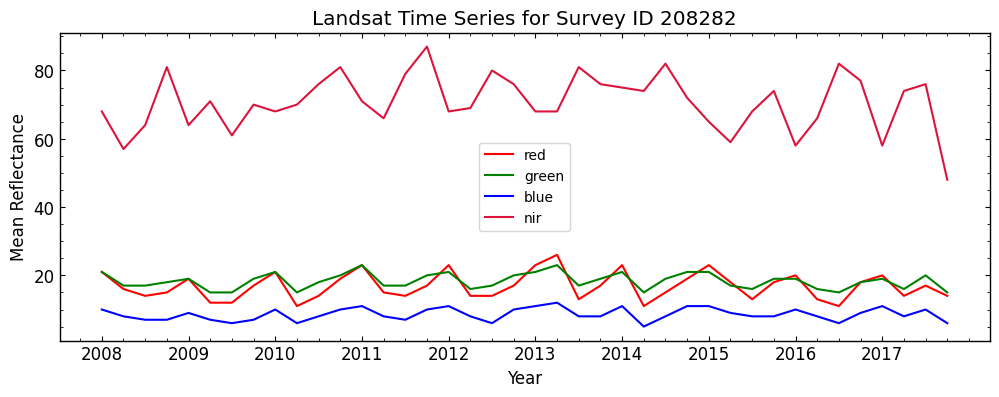

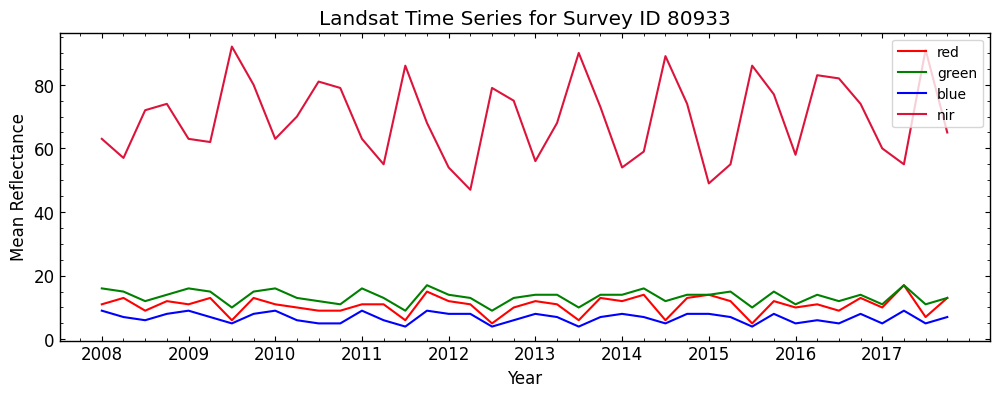

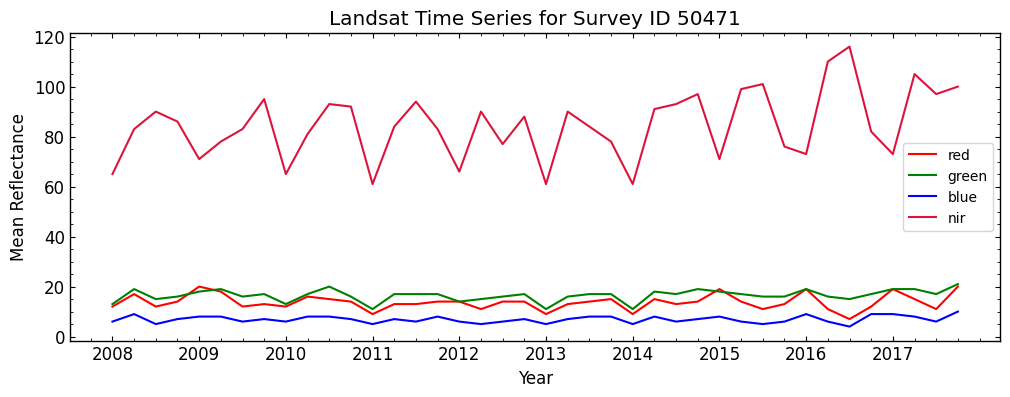

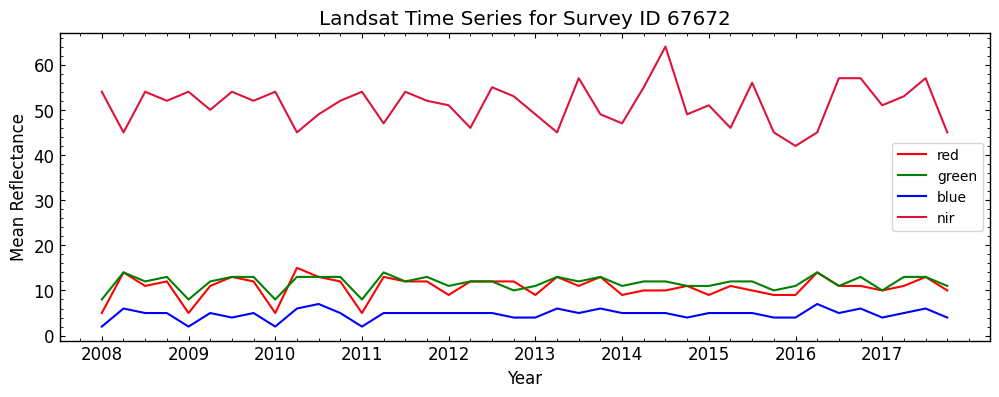

In [26]:
survey_ids = np.random.choice(landsat_timeseries['surveyId'].unique(), size=4, replace=False)
for survey_id in survey_ids:
    plot_landsat_timeseries(survey_id)

## Satellite patches

* R+G+B bands
* 128x128px (10m/px)
* **3x128x128 values per survey**

In [28]:
satellite_patches = np.load('data/satellite_patches_training.npy')
satellite_patches.shape

(5000, 3, 128, 128)

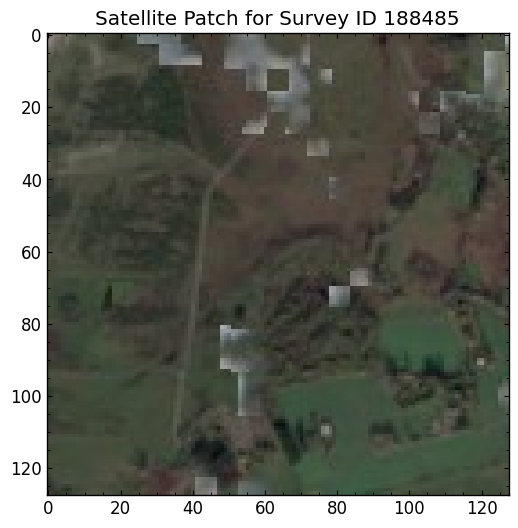

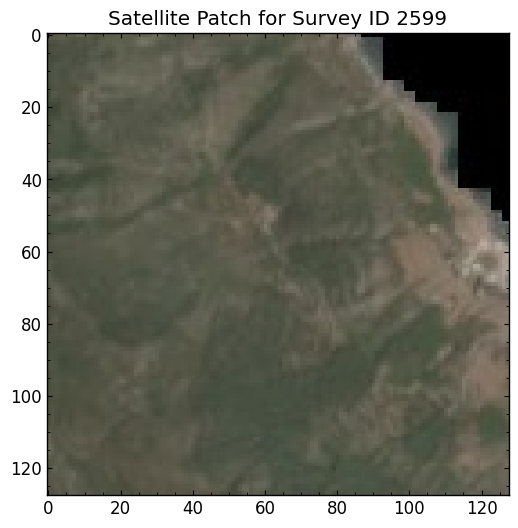

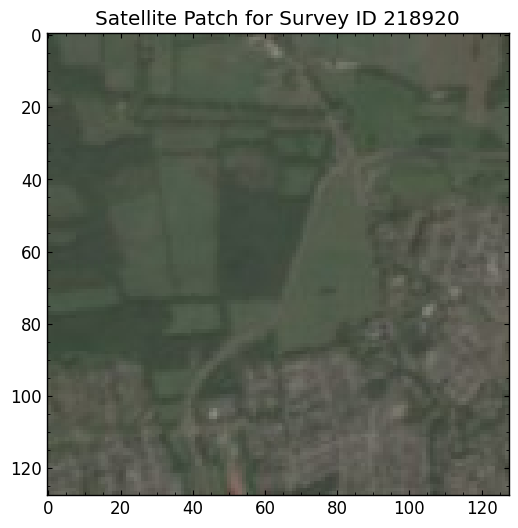

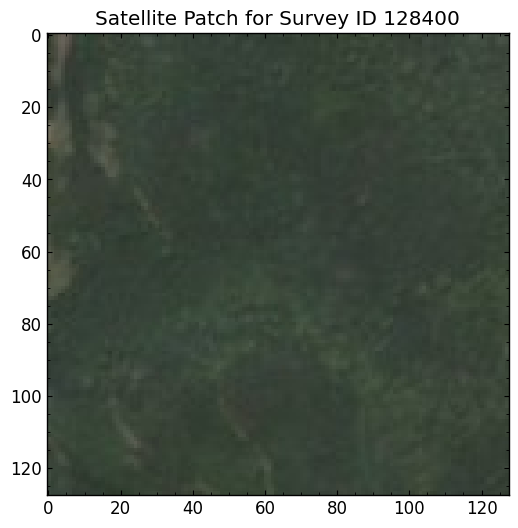

In [32]:
ids = np.random.randint(0, len(landsat_timeseries), size=4)
for id in ids:
    patch = satellite_patches[id]
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(np.transpose(patch, (1, 2, 0)))
    ax.set_title(f'Satellite Patch for Survey ID {landsat_timeseries.iloc[id]["surveyId"]:.0f}')
    plt.show()

## Species data

* Boolean labels
* **342 values per survey**

In [33]:
species_data = np.load('data/species_data_training.npy')
species_data.shape

(5000, 342)

In [34]:
ids = np.random.randint(0, len(landsat_timeseries), size=4)
for id in ids:
    print(f'Species Data for Survey ID {landsat_timeseries.iloc[id]["surveyId"]:.0f}: {species_data[id]}')

Species Data for Survey ID 163206: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0]
Species Data for Survey ID 197814: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0